In [ ]:
# Name: Charlie Zhang
# Student number:1009855514

## **Examine the dataset**:

In [51]:
import pandas as pd

# Load the dataset from the Excel file
data  = pd.read_excel('INF2178_A1_data.xlsx')

# Display the first few rows of the dataframe to understand its structure
data.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

## **Compute occupancy rates using** `OCCUPIED_BEDS/OCCUPIED_ROOMS`

In [53]:
# Bed occupancy rate
data['BED_OCCUPANCY_RATE'] = data['OCCUPIED_BEDS'] / data['CAPACITY_ACTUAL_BED']

# Room occupancy rate
data['ROOM_OCCUPANCY_RATE'] = data['OCCUPIED_ROOMS'] / data['CAPACITY_ACTUAL_ROOM']

# Drop the  NaN as they can't be used in t-tests
clean_data = data.dropna(subset=['BED_OCCUPANCY_RATE', 'ROOM_OCCUPANCY_RATE'], how='all')

# Now let's look at the cleaned data and the new occupancy rate columns
clean_data [['BED_OCCUPANCY_RATE', 'ROOM_OCCUPANCY_RATE']].describe()


,BED_OCCUPANCY_RATE,ROOM_OCCUPANCY_RATE
count,32399.000000,18545.000000
mean,0.927885,0.934087
std,0.122562,0.163241
min,0.022727,0.012048
25%,0.900000,0.958333
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.014085


### **T-Test** for `PROGRAM_MODEL` with `BED_OCCUPANCY_RATE`

In [54]:
from scipy import stats
df = clean_data.copy()
categories = df['OVERNIGHT_SERVICE_TYPE'].unique()

# Assume there are two categories for simplicity
group1 = df[df['OVERNIGHT_SERVICE_TYPE'] == categories[0]]['BED_OCCUPANCY_RATE']
group2 = df[df['OVERNIGHT_SERVICE_TYPE'] == categories[1]]['BED_OCCUPANCY_RATE']

# Perform T-Test
t_statistic, p_value = stats.ttest_ind(group1, group2, nan_policy='omit')

print(f"T-Statistic(BED_OCCUPANCY_RATE) = {t_statistic}")
print(f"P-Value = {p_value}")


T-Statistic(BED_OCCUPANCY_RATE) = -29.99987778443592
P-Value = 1.004985053552184e-194


### **T-Test** for `PROGRAM_MODEL ` with `ROOM_OCCUPANCY_RATE`

In [55]:
# T-Test for PROGRAM_MODEL
program_models = df['PROGRAM_MODEL'].unique()

# Assuming there are at least two different program models
group1_model = df[df['PROGRAM_MODEL'] == program_models[0]]['BED_OCCUPANCY_RATE']
group2_model = df[df['PROGRAM_MODEL'] == program_models[1]]['BED_OCCUPANCY_RATE']

t_statistic_model, p_value_model = stats.ttest_ind(group1_model, group2_model, nan_policy='omit')

print(f"T-Statistic(ROOM_OCCUPANCY_RATE) = {t_statistic_model}")
print(f"P-Value = {p_value_model}")

T-Statistic(ROOM_OCCUPANCY_RATE) = 38.780694714817365
P-Value = 0.0


### **T-Test** for `SECTOR ` with `BED_OCCUPANCY_RATE`

In [56]:
# T-Test for SECTOR
sectors = df['SECTOR'].unique()

# Assuming there are at least two different sectors
group1_sector = df[df['SECTOR'] == sectors[0]]['ROOM_OCCUPANCY_RATE']
group2_sector = df[df['SECTOR'] == sectors[1]]['ROOM_OCCUPANCY_RATE']

t_statistic_sector, p_value_sector = stats.ttest_ind(group1_sector, group2_sector, nan_policy='omit')

print(f"T-Statistic(SECTOR) = {t_statistic_sector}")
print(f"P-Value = {p_value_sector}")


T-Statistic(SECTOR) = 8.660754065466053
P-Value = 5.290740247388472e-18


## Exploratory Data Analysis##

In [57]:
# Summary statistics for numerical columns
summary_statistics = df.describe()
summary_statistics

,PROGRAM_ID,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,BED_OCCUPANCY_RATE,ROOM_OCCUPANCY_RATE
count,50944.000000,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000,32399.000000,18545.000000
mean,13986.125844,45.727171,31.627149,29.780271,55.549259,52.798598,0.927885,0.934087
std,1705.288632,53.326049,27.127682,26.379416,59.448805,58.792954,0.122562,0.163241
min,11791.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.022727,0.012048
25%,12233.000000,15.000000,15.000000,14.000000,19.000000,16.000000,0.900000,0.958333
50%,14251.000000,28.000000,25.000000,23.000000,35.000000,34.000000,1.000000,1.000000
75%,15651.000000,51.000000,43.000000,41.000000,68.000000,66.000000,1.000000,1.000000
max,16631.000000,339.000000,234.000000,234.000000,268.000000,268.000000,1.000000,1.014085


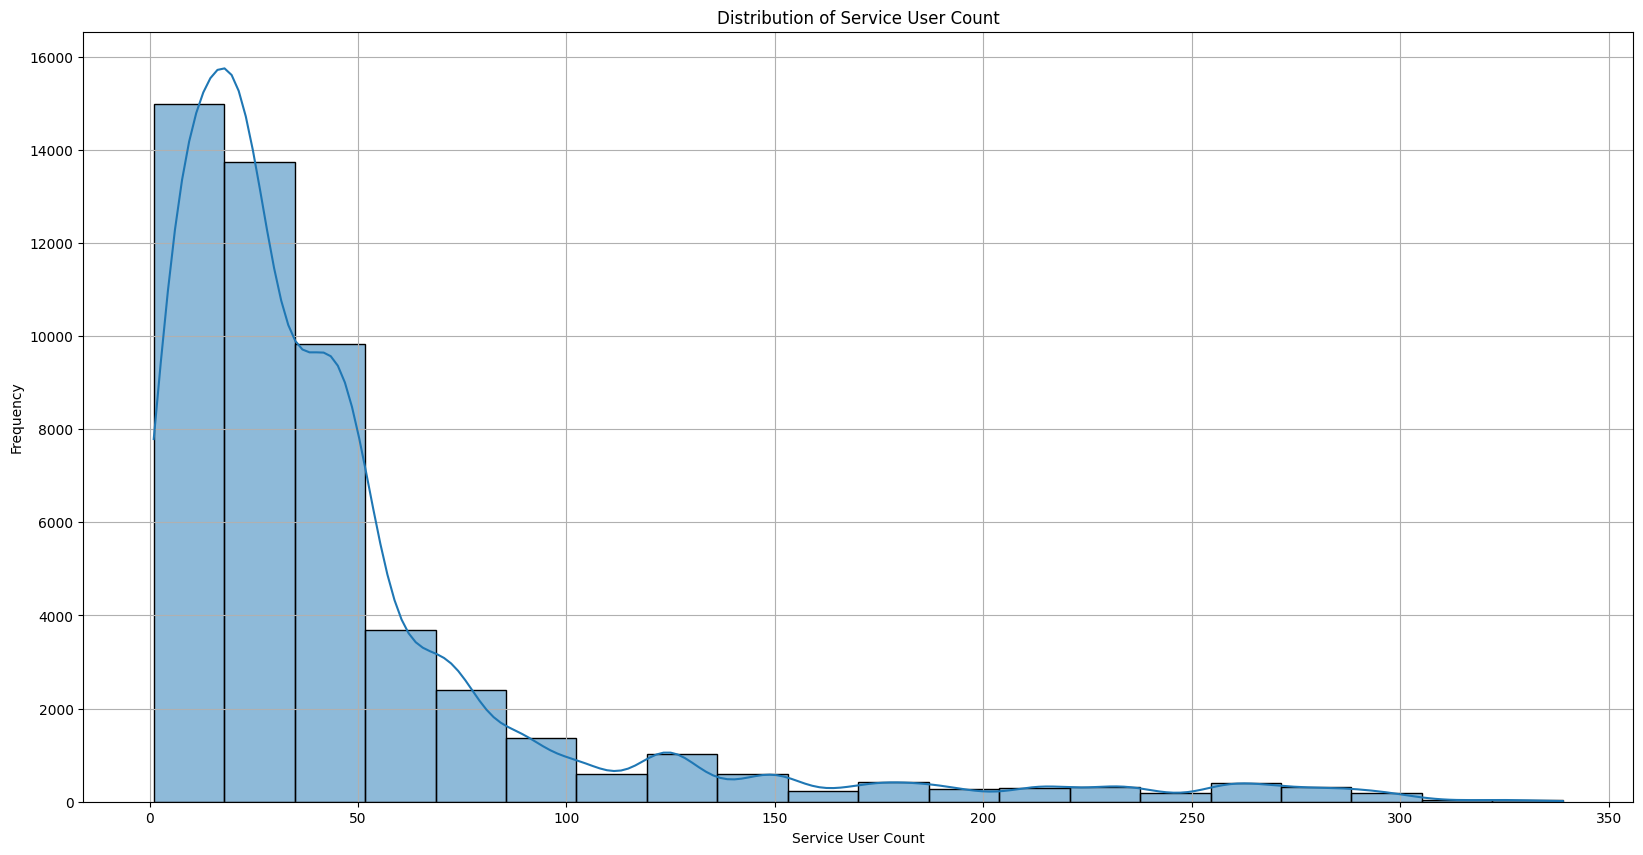

In [58]:
# Distribution of SERVICE_USER_COUNT
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.histplot(df['SERVICE_USER_COUNT'], bins=20, kde=True)
plt.title('Distribution of Service User Count')
plt.xlabel('Service User Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

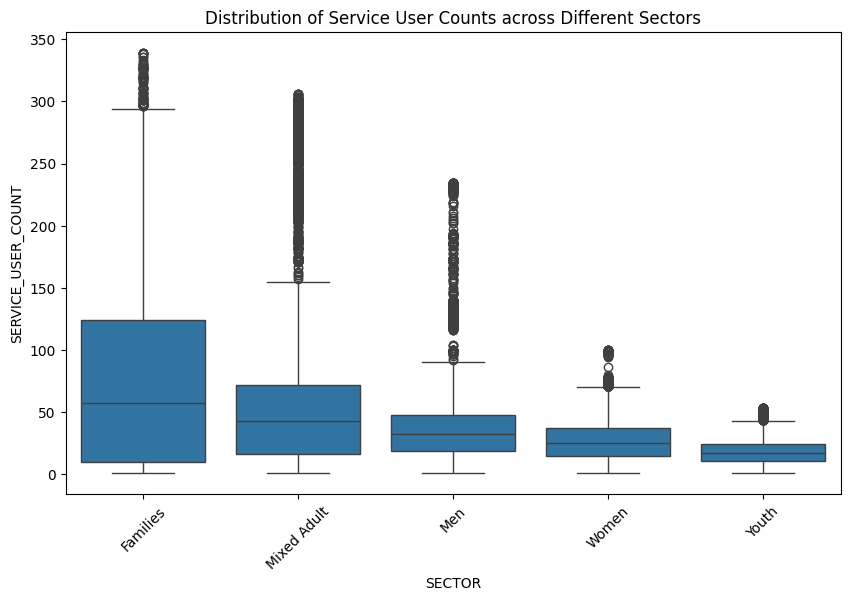

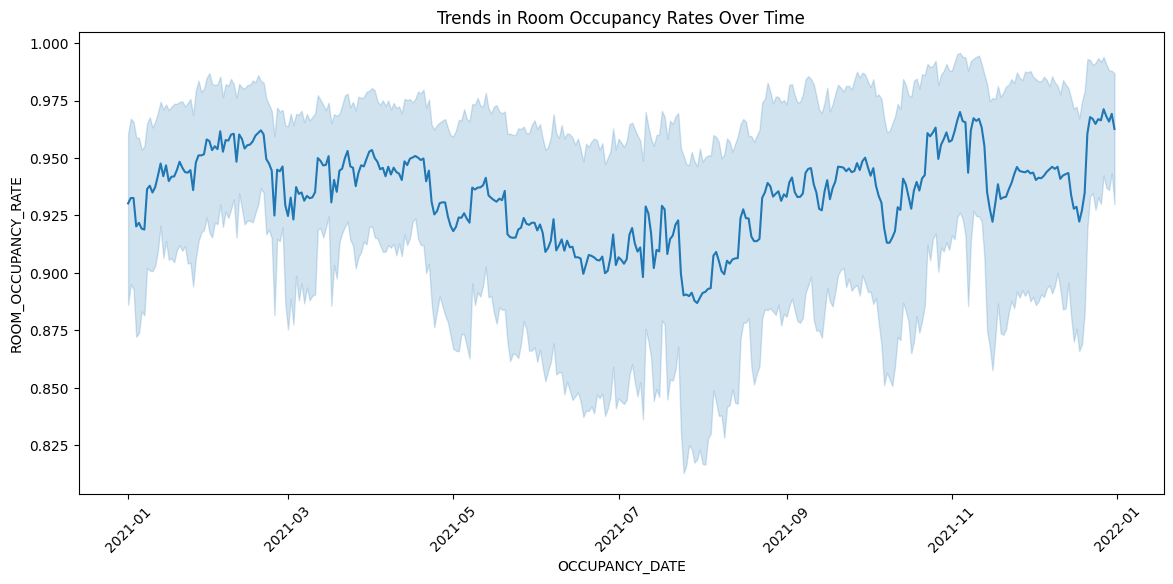

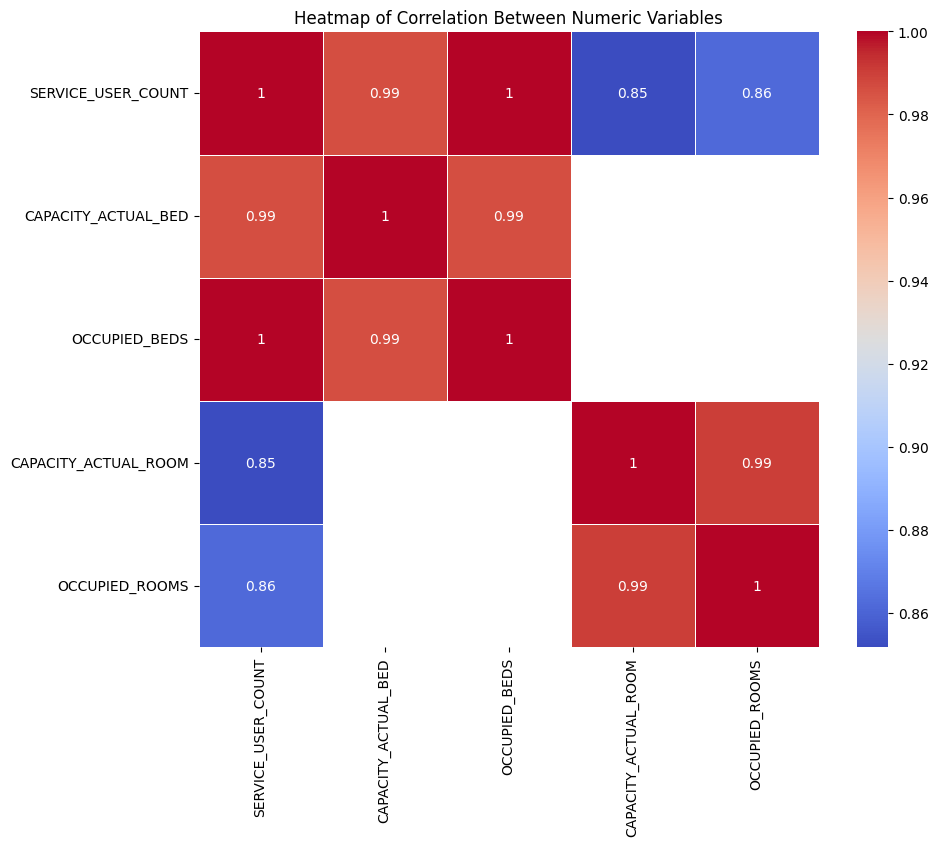

In [74]:
# Distribution of Service User Counts across Different Sectors
plt.figure(figsize=(10, 6))
sns.boxplot(x='SECTOR', y='SERVICE_USER_COUNT', data=data)
plt.title('Distribution of Service User Counts across Different Sectors')
plt.xticks(rotation=45)
plt.show()

# Trends in Room Occupancy Rates Over Time
# Filtering out rows where 'OCCUPIED_ROOMS' and 'CAPACITY_ACTUAL_ROOM' are NaN for accurate plotting
room_occupancy_data = data.dropna(subset=['OCCUPIED_ROOMS', 'CAPACITY_ACTUAL_ROOM']).copy()
room_occupancy_data.loc[:, 'ROOM_OCCUPANCY_RATE'] = room_occupancy_data['OCCUPIED_ROOMS'] / room_occupancy_data['CAPACITY_ACTUAL_ROOM']

plt.figure(figsize=(14, 6))
sns.lineplot(x='OCCUPANCY_DATE', y='ROOM_OCCUPANCY_RATE', data=room_occupancy_data, estimator='mean')
plt.title('Trends in Room Occupancy Rates Over Time')
plt.xticks(rotation=45)
plt.show()

# Calculate the correlation matrix for numeric variables
correlation_matrix = data[['SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Between Numeric Variables')
plt.show()
